# Optimal transport in $\mathbb{R}$

Let
- ($\Omega_{X}$, $F_{X}$, $\mu$) and ($\Omega_{Y}$, $F_{Y}$, $\nu$) be two probability spaces
- $X: \Omega_{X} \rightarrow \mathbb{R}$ and $Y: \Omega_{Y} \rightarrow \mathbb{R}$ two random variables
- The cdf of $X$, noted $F_{\mu}$ is continous in $\mathbb{R}$
- The cost function $c_{T}(x,y) = h_{T}(x-y)$ is convex

The optimal transport of $X$ to $Y$ is given by:
$$T(x) = F_{\nu}^{-1} F_{\mu}(x)$$

where

- $F_{\mu}$ is the cdf of $X$
- $F_{v}$ is the cdf of $Y$

In [5]:
import Random
using Distributions
using Plots
using StatsPlots
seed = 1234
gen = Random.Xoshiro(seed);

In [6]:
# X ~ N(0,1) and Y ~ N(0, sqrt(2))
distμ = Normal();
distν = Normal(0., 2.);

In [7]:
N = 1_000
x = rand(distμ, N);
y = rand(distν, N);

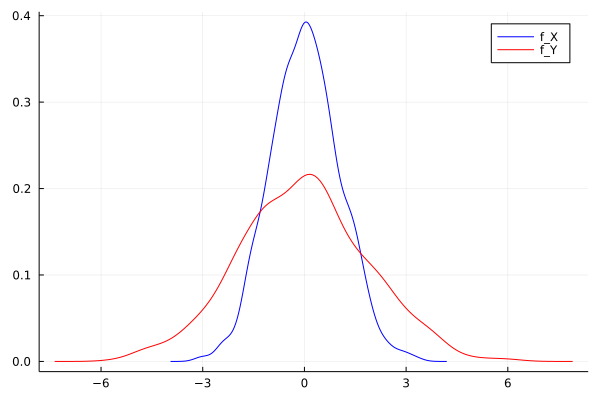

In [8]:
density(x, color = :blue, labels = "f_X")
density!(y, color = :red, labels = "f_Y")

**Optimal transport map of X to Y**

In [9]:
function optimal_fn(x, μ, ν)
    # p = Fμ(x)
    p = Distributions.cdf(μ, x)
    # q = F-1ν(p)
    q = Distributions.quantile(ν, p)
    return q
end

optimal_fn (generic function with 1 method)

**Compute y = T(x)**

In [10]:
tx = sort([optimal_fn(_x, distμ, distν) for _x in x]);

**Compare T(x) and y**

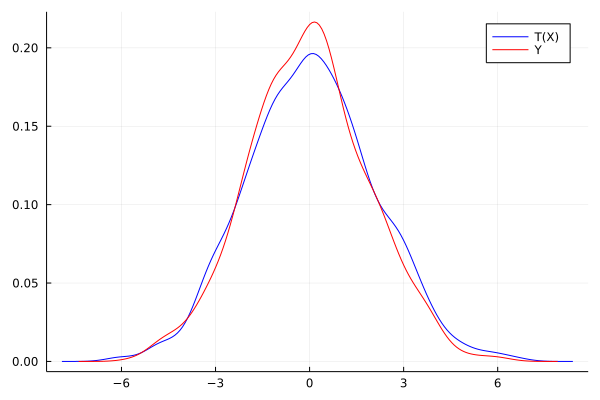

In [11]:
density(tx, color = :blue, labels = "T(X)")
density!(y, color = :red, labels = "Y")

The distribution of $T(x) = F^{-1}_{v}(F_{ν}(x))$ and $y$ have similar shapes

**Cost function**

In $\mathbb{R}$, the optimal transportation function does'nt depend on the cost function.

Let $c_{T}(x, y) = h_{T}(x-y) = (x-y)^2$

The empirical risk of $T$ is 

$$
\begin{align}
R &= \frac{1}{N} \sum_{i=1}^{N} c_{T}(x_{i}, y_{i}) \\
  &= \frac{1}{N} \sum_{i=1}^{N} (x_{i} - y_{i})^2
\end{align}
$$

In [12]:
cost_fn(x, y) = (x - y)^2

cost_fn (generic function with 1 method)

In [13]:
risk(cost::Function, x, y) = sum([cost(_x, _y) for (_x, _y) in zip(x, y)]) / N

risk (generic function with 1 method)

In [14]:
risk(cost_fn, x, tx)

5.231441862537706